

# Project: TMDB Movie Data Analysis

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

- The Movie Database (TMDb) is a community built movie and TV database. Today I'll be doing an investigation on the TMDB Movie Datasets, to have a better understanding of different Movies and also practice my skills
- The two questions I'm focus on will be "Which genres are most popular from year to year?" and also "What kinds of properties are associated with movies that have high revenues?"
- For the first question I'm will be looking to find the relationship between popularity and time, and also for multiple genre in a movie I'll need to separate them to compare different genere's as the final result. The data cleaning phase will focus on these variables, and since genre is pretty unique for each movie, we will need to exclude any entry has empty genre info.
- The second quesiton I'll be checking through multiple point of view, popularity/budget and especially director and actor. I would like to see if I can find any direct relation between any of these factor versus revenue. Also in this section, data cleaning phase I'll try to fill bad entry with mean value, also excluding any entry has empty director or actor info.


In [59]:
# Use this cell to set up import statements for all of the packages that you
#   plan to use.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
import sys
sys.setrecursionlimit(1500)

# Remember to include a 'magic word' so that your visualizations are plotted
#   inline with the notebook. See this page for more:
#   http://ipython.readthedocs.io/en/stable/interactive/magics.html
%matplotlib inline

<a id='wrangling'></a>
## Data Wrangling

### General Properties
- After overview the csv file I do found there's a lot of column have missing value, now I'm trying to determine which column had the most missing item and try cleanning it. Most of the column in this dataset will be string not number.

In [7]:
# Load your data and print out a few lines. Perform operations to inspect data
sample=pd.read_csv('tmdb-movies.csv')
#   types and look for instances of missing or possibly errant data.
sample.head()
sample.shape
missing_df = sample.isnull().sum(axis=0).reset_index()
missing_df.columns = ['column_name', 'missing_count']
missing_df['filling_factor'] = (sample.shape[0] 
                                - missing_df['missing_count']) / sample.shape[0] * 100
missing_df.sort_values('filling_factor').reset_index(drop = True)


,column_name,missing_count,filling_factor
0,homepage,7930,27.020063
1,tagline,2824,74.010676
2,keywords,1493,86.259893
3,production_companies,1030,90.520891
4,cast,76,99.300571
5,director,44,99.595067
6,genres,23,99.788331
7,imdb_id,10,99.907970
8,overview,4,99.963188
9,release_year,0,100.000000



### Data Cleaning 

- From last chart we can see the percentage of missing value in this dataset, column homepage & tagline having the most missing data. Also both column is consist of string value so it's unable to using mean value to fill in. I'm filling in a dummy value "Unknown" here for both column as well as others

In [8]:
dummy={'imdb_id':'Unknown','cast':'Unknown','homepage':'Unknown','director':'Unknown','tagline':'Unknown','keywords':'Unknown','overview':'Unknown','genres':'Unknown','production_companies':'Unknown'}
sample.fillna(value=dummy,inplace=True)
#fillna column
sample.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
id                      10866 non-null int64
imdb_id                 10866 non-null object
popularity              10866 non-null float64
budget                  10866 non-null int64
revenue                 10866 non-null int64
original_title          10866 non-null object
cast                    10866 non-null object
homepage                10866 non-null object
director                10866 non-null object
tagline                 10866 non-null object
keywords                10866 non-null object
overview                10866 non-null object
runtime                 10866 non-null int64
genres                  10866 non-null object
production_companies    10866 non-null object
release_date            10866 non-null object
vote_count              10866 non-null int64
vote_average            10866 non-null float64
release_year            10866 non-null int64
budget_adj           

- Now Checking if there's duplicated row in this dataset, we found 1 and will be removing it

In [9]:
print(sample.duplicated().sum())

#check duplicated row, remove dups

1


In [10]:
sample.drop_duplicates(inplace=True)
sample.shape

(10865, 21)

In [11]:
sample.head()

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


In [12]:
# Use this, and more code cells, to explore your data. Don't forget to add
#   Markdown cells to document your observations and findings.
gen=sample[sample['genres']!='Unknown'].copy()
gen['genres'].head()

0    Action|Adventure|Science Fiction|Thriller
1    Action|Adventure|Science Fiction|Thriller
2           Adventure|Science Fiction|Thriller
3     Action|Adventure|Science Fiction|Fantasy
4                        Action|Crime|Thriller
Name: genres, dtype: object

In [13]:
#expanding genere
genre_details = list(map(str,(gen['genres'])))
genre = []
for i in genre_details:
    split_genre = list(map(str, i.split('|')))
    for j in split_genre:
        if j not in genre:
            genre.append(j)
# printing list of seperated genres.
print(genre)

df=gen.copy()

['Action', 'Adventure', 'Science Fiction', 'Thriller', 'Fantasy', 'Crime', 'Western', 'Drama', 'Family', 'Animation', 'Comedy', 'Mystery', 'Romance', 'War', 'History', 'Music', 'Horror', 'Documentary', 'TV Movie', 'Foreign']


In [14]:
for word in genre:
    df[word] = df['genres'].map(lambda s: 1 if word in str(s) else 0)

#Slicing genres to each column


<a id='eda'></a>
## Exploratory Data Analysis

### Which genres are most popular from year to year?

In [15]:
df['decades']=df['release_year'].astype(str).str[0:3]+'0'
#Slicing year by decades

- So now we have the data of popularity and time (I'm choosing decades as the unit), I want to see the overall trending for the popularity in general without separate into different genres, this will give me a primal idea how the popularity goes over time.
- Also on the other hand the development of movie industry should also having impact on these values, I'll also try to get the # of film relased per year over time as a reference

Text(0.5,1,'# of Movies Released Over Year')

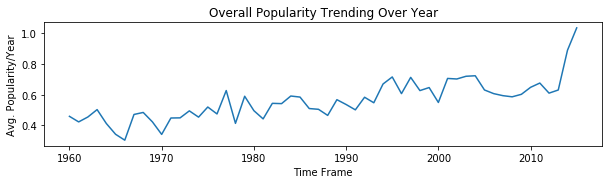

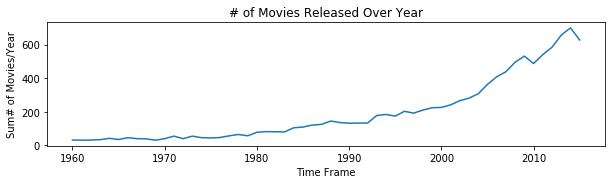

In [16]:
#Overall Trend
plt.figure(1,figsize=(10,5))
plt.subplot(211)
plt.plot(df.groupby('release_year')['popularity'].mean())
plt.xlabel('Time Frame')
plt.ylabel('Avg. Popularity/Year')
plt.title('Overall Popularity Trending Over Year')
plt.figure(2,figsize=(10,5))
plt.subplot(212)
plt.plot(df.groupby('release_year')['original_title'].count())
plt.xlabel('Time Frame')
plt.ylabel('Sum# of Movies/Year')
plt.title('# of Movies Released Over Year')

<a id='eda'></a>
## Popularity Over Year

- As we can see here, the more movie released each year drives higher popularity, however it will be not easy to just comparing populiarity of 2 movies in diffrent era. The new movie might shows higher popularity today in numbers but the older movie had more popularity during that time.

Here's the overall average popularity for different genres sort from highest to lowest

In [17]:
p={}
for w in genre:
    pop_mean=df[df[w]==1]['popularity'].mean()
    p[w]=pop_mean
    #print(pop_mean)
sorted(p.items(), key=lambda x:x[1],reverse=True)

[('Adventure', 1.1542590441876273),
 ('Science Fiction', 1.0015476501220504),
 ('Fantasy', 0.99283970633187768),
 ('Action', 0.92627443582214752),
 ('Animation', 0.85218165236051491),
 ('Family', 0.78666839398862698),
 ('Crime', 0.7449304453471195),
 ('Thriller', 0.74156299277605775),
 ('War', 0.72768314814814816),
 ('Mystery', 0.69001213209876522),
 ('Comedy', 0.59260734220933287),
 ('Romance', 0.5920820490654205),
 ('Drama', 0.59149531827731094),
 ('Western', 0.59061547878787868),
 ('History', 0.57593594311377239),
 ('Music', 0.48732118382352935),
 ('Horror', 0.46535663042150271),
 ('TV Movie', 0.27089576047904185),
 ('Foreign', 0.19149632446808507),
 ('Documentary', 0.18143162499999996)]

- After gathering the big picture view now I'll try to plot each genres popularities over the decades. Also adding a 75% level line to help me identify most popular genes in each era

In [18]:
df.groupby('decades')['popularity'].describe()

,count,mean,std,min,25%,50%,75%,max
decades,,,,,,,,
1960,362.0,0.424244,0.504561,0.002757,0.151936,0.258688,0.508717,3.309196
1970,506.0,0.485495,0.763694,0.000188,0.172999,0.317801,0.516276,12.037933
1980,1062.0,0.524726,0.599965,0.000065,0.205567,0.351959,0.597229,6.095293
1990,1763.0,0.621460,0.714339,0.006863,0.252331,0.420915,0.731523,8.947905
2000,3556.0,0.632699,0.769113,0.000973,0.218780,0.406106,0.743710,9.432768
2010,3593.0,0.756405,1.396095,0.000620,0.191228,0.377897,0.791799,32.985763


In [19]:
pop_1=df[df['Adventure']==1].groupby('decades')['popularity'].mean()
pop_2=df[df['Science Fiction']==1].groupby('decades')['popularity'].mean()
pop_3=df[df['Fantasy']==1].groupby('decades')['popularity'].mean()
pop_4=df[df['Action']==1].groupby('decades')['popularity'].mean()
pop_5=df[df['Animation']==1].groupby('decades')['popularity'].mean()
pop_6=df[df['Family']==1].groupby('decades')['popularity'].mean()
pop_7=df[df['Crime']==1].groupby('decades')['popularity'].mean()
pop_8=df[df['Thriller']==1].groupby('decades')['popularity'].mean()
pop_9=df[df['War']==1].groupby('decades')['popularity'].mean()
pop_10=df[df['Mystery']==1].groupby('decades')['popularity'].mean()
pop_11=df[df['Comedy']==1].groupby('decades')['popularity'].mean()
pop_12=df[df['Romance']==1].groupby('decades')['popularity'].mean()
pop_13=df[df['Drama']==1].groupby('decades')['popularity'].mean()
pop_14=df[df['Western']==1].groupby('decades')['popularity'].mean()
pop_15=df[df['History']==1].groupby('decades')['popularity'].mean()
pop_16=df[df['Music']==1].groupby('decades')['popularity'].mean()
pop_17=df[df['Horror']==1].groupby('decades')['popularity'].mean()
pop_18=df[df['TV Movie']==1].groupby('decades')['popularity'].mean()
pop_19=df[df['Foreign']==1].groupby('decades')['popularity'].mean()
pop_20=df[df['Documentary']==1].groupby('decades')['popularity'].mean()
perc_75=df.groupby('decades')['popularity'].describe()['75%']

Text(0.5,1,'Genres Popularity - Year Trendview')

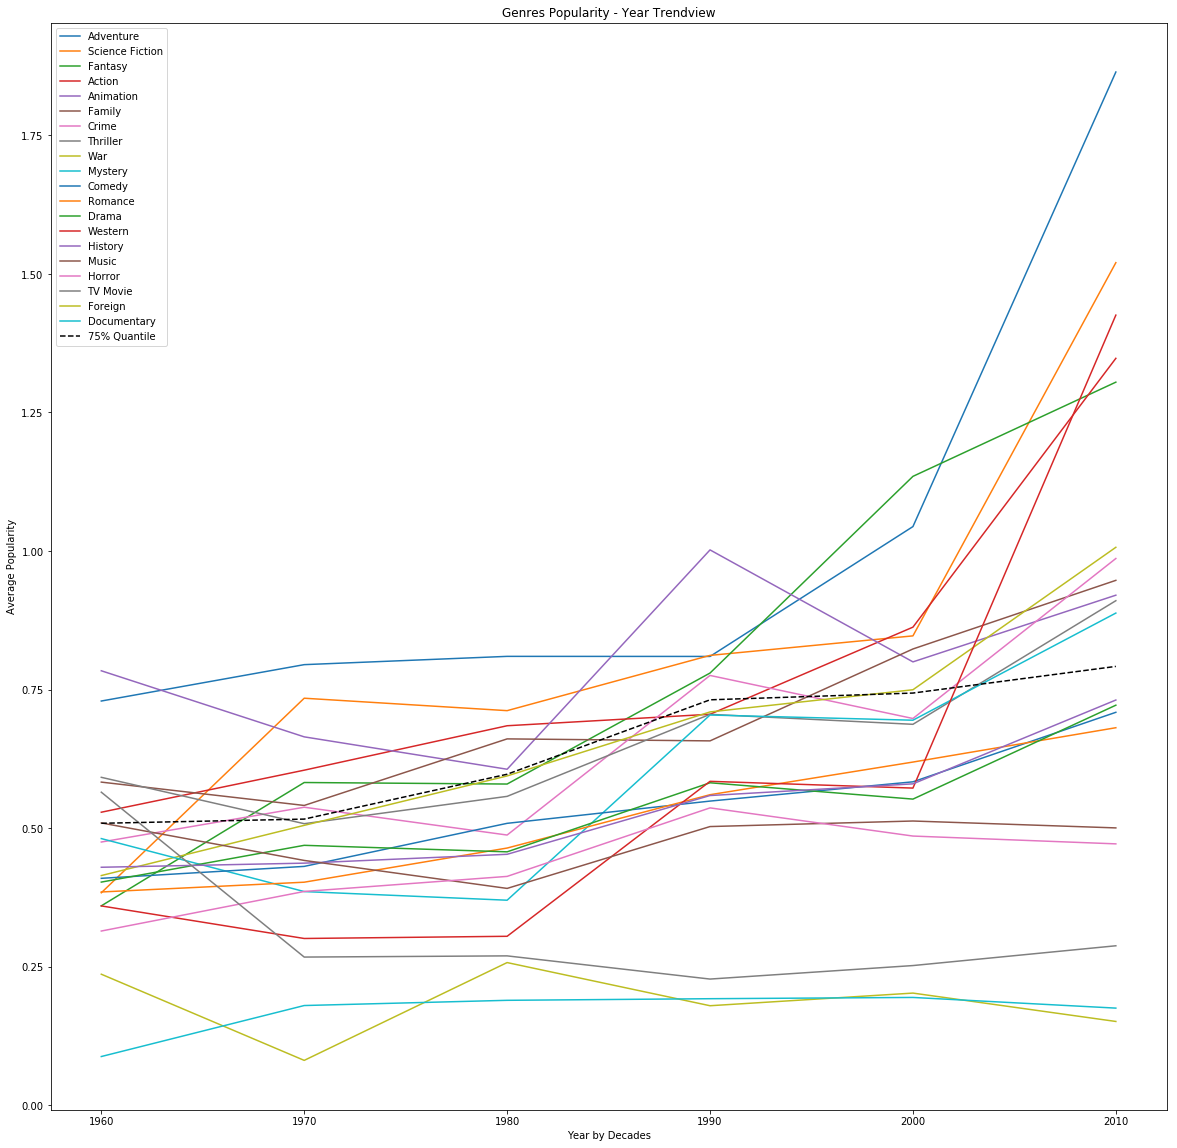

In [20]:
plt.clf()
fig, ax = plt.subplots(figsize=(20, 20))
ax.plot(pop_1.index, pop_1, label='Adventure')
ax.plot(pop_2.index, pop_2, label='Science Fiction')
ax.plot(pop_3.index, pop_3, label='Fantasy')
ax.plot(pop_4.index, pop_4, label='Action')
ax.plot(pop_5.index, pop_5, label='Animation')
ax.plot(pop_6.index, pop_6, label='Family')
ax.plot(pop_7.index, pop_7, label='Crime')
ax.plot(pop_8.index, pop_8, label='Thriller')
ax.plot(pop_9.index, pop_9, label='War')
ax.plot(pop_10.index, pop_10,label='Mystery')
ax.plot(pop_11.index, pop_11,label='Comedy')
ax.plot(pop_12.index, pop_12,label='Romance')
ax.plot(pop_13.index, pop_13,label='Drama')
ax.plot(pop_14.index, pop_14,label='Western')
ax.plot(pop_15.index, pop_15,label='History')
ax.plot(pop_16.index, pop_16,label='Music')
ax.plot(pop_17.index, pop_17,label='Horror')
ax.plot(pop_18.index, pop_18,label='TV Movie')
ax.plot(pop_19.index, pop_19,label='Foreign')
ax.plot(pop_20.index, pop_20,label='Documentary')
ax.plot(perc_75.index,perc_75,color='k',linestyle='dashed',label='75% Quantile')
plt.legend()
plt.ylabel('Average Popularity')
plt.xlabel('Year by Decades')
plt.title('Genres Popularity - Year Trendview')

<a id='eda'></a>
## Most popular genres

- The most popular genres is varies by different era.
- In the early 1960s-1970s, Advanture,Animation,Family,Thriller and TV Movie were the most popular in the market.
- When it comes to 1970s-1980s, Science Fiction, Drama, Action movie start draws more attention.
- From 1980s-1990s, the Animation genres took a huges step up in popularities.
- After year 2000 to today, Adventrue, Science Fiction, Action, Western and Fantasy are the most dominate in popularities


## What kinds of properties are associated with movies that have high revenues?

In [21]:
sample[sample['revenue_adj']==0].count()

id                      6016
imdb_id                 6016
popularity              6016
budget                  6016
revenue                 6016
original_title          6016
cast                    6016
homepage                6016
director                6016
tagline                 6016
keywords                6016
overview                6016
runtime                 6016
genres                  6016
production_companies    6016
release_date            6016
vote_count              6016
vote_average            6016
release_year            6016
budget_adj              6016
revenue_adj             6016
dtype: int64

- For this question, I'm going to usd revenue adjustment data since it can represent more true numbers over the time. However over 60% of revenue data is 0 which is not good for this analysis. This also applies to the budget data.
- The 0 data I'll fill in with the mean value so it won't infectuate the overall result
- Filtering out unknown casting & director, unuseful data for the point I'm researching

In [22]:
# Continue to explore the data to address your additional research
#   questions. Add more headers as needed if you have more questions to
#   investigate.

rv=sample.copy()   #Filter out 0 buget value 
#From Kaggle:(It's probably a good idea to keep treating zeros as missing, with the caveat that missing budgets much more likely to have been from small budget films in the first place).
rv=rv[rv['cast']!='Unknown']
rv=rv[rv['director']!='Unknown']

- First fill all 0 value to NaN, then using fillna function fill all column with mean value

In [23]:
#tst=sample.replace('revenue_adj':0,sample['revenue_adj'].mean())
rv['revenue_adj']=rv['revenue_adj'].replace(0,np.NaN)
rv['budget_adj']=rv['budget_adj'].replace(0,np.NaN)
rev_adj_mean=rv['revenue_adj'].mean()
bud_adj_mean=rv['budget_adj'].mean()
rv['revenue_adj'].fillna(rev_adj_mean,inplace=True)
rv['budget_adj'].fillna(bud_adj_mean,inplace=True)
rv['revenue_adj']=rv['revenue_adj'].astype

In [24]:
rv['budget_adj'].mean()

36988649.108225927

In [25]:
rv['revenue_adj'].mean()

115234121.01716015

In [26]:
rv['revenue_adj'].describe().astype(int)
# 75% Average Revenue as mark line

count         10751
mean      115234121
std       133516654
min               2
25%        57619795
50%       115234121
75%       115234121
max      2827123750
Name: revenue_adj, dtype: int64

In [27]:
rv.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10751 entries, 0 to 10865
Data columns (total 21 columns):
id                      10751 non-null int64
imdb_id                 10751 non-null object
popularity              10751 non-null float64
budget                  10751 non-null int64
revenue                 10751 non-null int64
original_title          10751 non-null object
cast                    10751 non-null object
homepage                10751 non-null object
director                10751 non-null object
tagline                 10751 non-null object
keywords                10751 non-null object
overview                10751 non-null object
runtime                 10751 non-null int64
genres                  10751 non-null object
production_companies    10751 non-null object
release_date            10751 non-null object
vote_count              10751 non-null int64
vote_average            10751 non-null float64
release_year            10751 non-null int64
budget_adj           

Text(0.5,1,'Data Correlation Table')

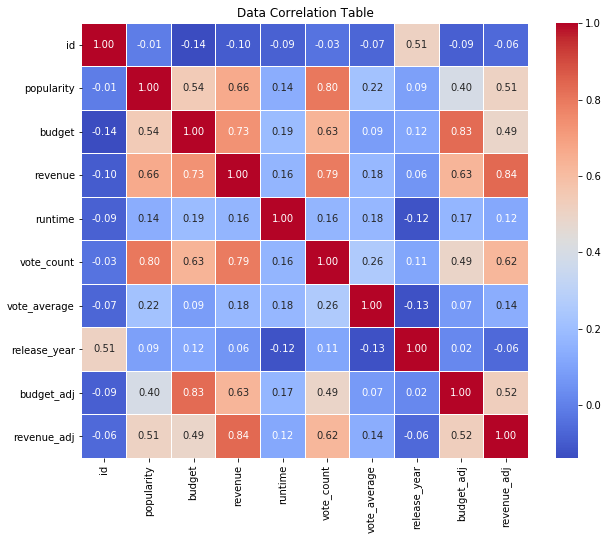

In [28]:
plt.figure(figsize = (10,8))
g = sns.heatmap(rv[list(rv)].corr(),annot=True, fmt = ".2f", cmap = "coolwarm",linewidths= 0.01)
plt.title('Data Correlation Table')
#relevence between revenues

### Vote Avg. v.s Revenue

Text(0.5,1,'Vote Avg. - Movie Revenue Distribution')

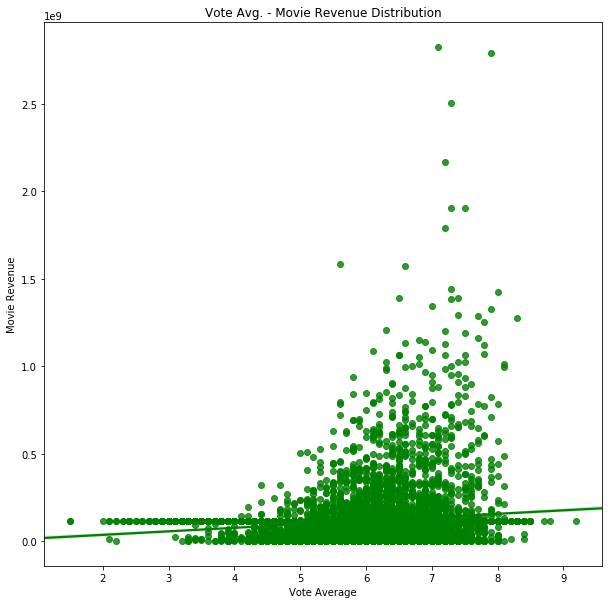

In [61]:
plt.figure(figsize = (10,10))
sns.regplot(x="vote_average", y="revenue_adj", data=rv, color= 'G'); 
ticker.ScalarFormatter(useOffset=False)
plt.xlabel('Vote Average')
plt.ylabel('Movie Revenue')
plt.title('Vote Avg. - Movie Revenue Distribution')

- From this chart we can see mostly voting(0.79) and popularity(0.66) is related to revenue, and in positive correlation<br>
- However the popularity & voting is more likely generated after box office numbers are out, hence not a good reference to predict revenue.<br>



### Budget v.s Revenue

In [46]:
bdg=sample.copy()
bdg=bdg[bdg['revenue_adj']!=0]
bdg=bdg[bdg['budget_adj']!=0]
bdg['ratio']=bdg['revenue_adj']/bdg['budget_adj']
bdg['ratio'].describe().astype(int)

count       3854
mean         298
std        16442
min            0
25%            0
50%            2
75%            4
max      1018619
Name: ratio, dtype: int64

- Here I'm trying to see the revenue/budget ratio(ROI) for all the movies in the dataset. However I decided to remove '0' value entry not using mean value. Because after filling 60% entry with mean it heavyly influenced the pencentail result as well as mean value. After clean_up removing '0' values data, there's only 3848 entry left out of 10865, conclusion might be inaccruate due to the unavailability of the budget data.
- Overall the revenue and budget is propotionaly, over 50% of movie have average 211% ROI and over 25% of them have 400%. So in order to achieve a bigger revenue, the movie will need budget to support casting special effect etc.

### Director v.s Revenue


In [47]:
grouped = rv.groupby('director').count().reset_index()
grouped=grouped.sort_values('revenue_adj', ascending=False)
top_ten=grouped['director'].head(10)
top_ten=list(set(top_ten))    
print(top_ten)

['Ron Howard', 'Joel Schumacher', 'Steven Soderbergh', 'Steven Spielberg', 'Clint Eastwood', 'Ridley Scott', 'Martin Scorsese', 'Wes Craven', 'Woody Allen', 'Brian De Palma']


- Here I'm choosing overall top 10 director from filmography numbers in this dataset. The more famous the director, more movie he directed.

director
Brian De Palma       111287910
Clint Eastwood       134751828
Joel Schumacher      127195145
Martin Scorsese      127817256
Ridley Scott         188469569
Ron Howard           226728725
Steven Soderbergh    138702013
Steven Spielberg     532169483
Wes Craven            86409305
Woody Allen           87657893
Name: revenue_adj, dtype: int64

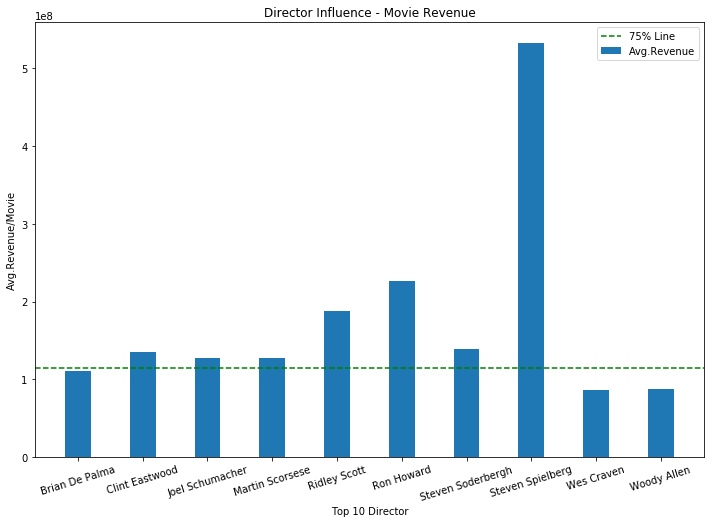

In [48]:
dire=rv.loc[rv['director'].isin(top_ten)]
top_ten_rev=dire.groupby('director')['revenue_adj'].mean().astype(int)
fig, ax = plt.subplots(figsize=(12,8))
index=np.arange(10)
bar_width=0.4
plt.bar(index,top_ten_rev,bar_width,label='Avg.Revenue')
plt.axhline(y=115234121,c='g',linestyle='dashed',label='75% Line')
plt.legend()
plt.xticks(index,list(top_ten_rev.reset_index()['director']),rotation=17)
plt.xlabel('Top 10 Director')
plt.ylabel('Avg.Revenue/Movie')
plt.title('Director Influence - Movie Revenue')
top_ten_rev

- Here's a chart comparing the top 10 director(by number of filmography) average movie revenue vs the top 75% revenue in the whole dataset. As we can see 8 of 10 director average revenue reaches the 75% mark, also to be mentioned Stephen Sipelberg had over 500 million USD influence towarding box office in average.

### Actor v.s Revenue

- Now I'm looking into actor, there's a lot of names in the cast column, I'll only pick first 3 as leading/supporting role in a movie


In [49]:
actr=rv.copy()
actr['Cast_1'], actr['Cast_2'] ,actr['Cast_3'],actr['Cast_4'], actr['Cast_5']= actr['cast'].str.split('|', 4).str
actr.drop(['Cast_4','Cast_5'],axis=1,inplace=True)
actr=actr[actr['Cast_3'].notnull()]
actr['revenue_adj'].describe().astype('int')

count         10527
mean      115382454
std       134868285
min               2
25%        55295030
50%       115234121
75%       115234121
max      2827123750
Name: revenue_adj, dtype: int64

In [50]:
grouped=actr.groupby('Cast_1').count().reset_index().sort_values('id', ascending=False).head(10)
top_ten_c1=list(set(grouped['Cast_1']))
grouped=actr.groupby('Cast_2').count().reset_index().sort_values('id', ascending=False).head(10)
top_ten_c2=list(grouped['Cast_2'])
grouped=actr.groupby('Cast_3').count().reset_index().sort_values('id', ascending=False).head(10)
top_ten_c3=list(set(grouped['Cast_3']))

print(top_ten_c1)
print(top_ten_c2)
print(top_ten_c3)

['Jean-Claude Van Damme', 'Clint Eastwood', 'Sylvester Stallone', 'Steven Seagal', 'Denzel Washington', 'Nicolas Cage', 'Bruce Willis', 'Johnny Depp', 'Tom Hanks', 'Robert De Niro']
['Diane Keaton', 'Julianne Moore', 'Morgan Freeman', 'Michael Caine', 'Tommy Lee Jones', 'Gene Hackman', 'Willem Dafoe', 'Ben Kingsley', 'Dustin Hoffman', 'Susan Sarandon']
['Rosario Dawson', 'Susan Sarandon', 'Cameron Diaz', 'Harvey Keitel', 'John Leguizamo', 'Ned Beatty', 'Donald Sutherland', 'Steve Buscemi', 'Samuel L. Jackson', 'Ed Harris']


- Heres the top 10 actor/actress by # of film casted, seperated by leading & supporting role

Cast_1
Bruce Willis             176624578
Clint Eastwood           122665128
Denzel Washington        122688395
Jean-Claude Van Damme     90126400
Johnny Depp              205535151
Nicolas Cage             114826073
Robert De Niro            96200633
Steven Seagal            109578346
Sylvester Stallone       188654558
Tom Hanks                288557742
Name: revenue_adj, dtype: int64

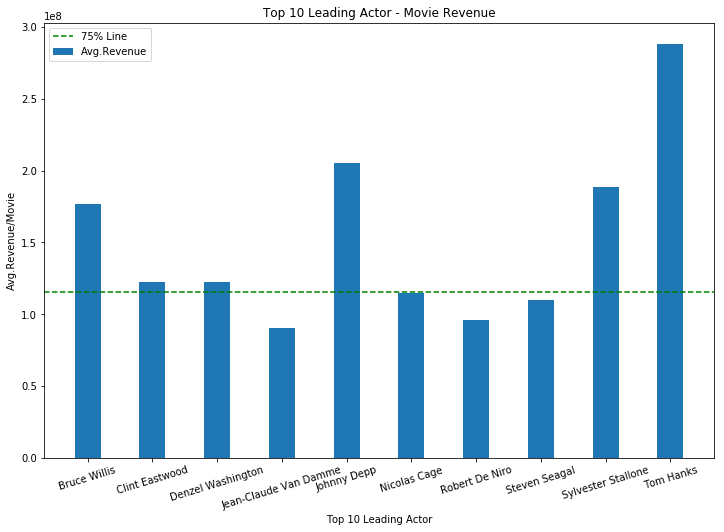

In [51]:
cast_1=actr.loc[actr['Cast_1'].isin(top_ten_c1)]
top_ten_rev=cast_1.groupby('Cast_1')['revenue_adj'].mean().astype(int)
fig, ax = plt.subplots(figsize=(12,8))
index=np.arange(10)
bar_width=0.4
plt.bar(index,top_ten_rev,bar_width,label='Avg.Revenue')
plt.axhline(y=115234121,c='g',linestyle='dashed',label='75% Line')
plt.legend()
plt.title('Top 10 Leading Actor - Movie Revenue')
plt.xticks(index,list(top_ten_rev.reset_index()['Cast_1']),rotation=17)
plt.xlabel('Top 10 Leading Actor')
plt.ylabel('Avg.Revenue/Movie')
top_ten_rev

Cast_2
Ben Kingsley        90680116
Diane Keaton       102484113
Dustin Hoffman     199504071
Gene Hackman       181655208
Julianne Moore     118729484
Michael Caine      216846418
Morgan Freeman     152979151
Susan Sarandon     112768768
Tommy Lee Jones    198142087
Willem Dafoe       148438691
Name: revenue_adj, dtype: int64

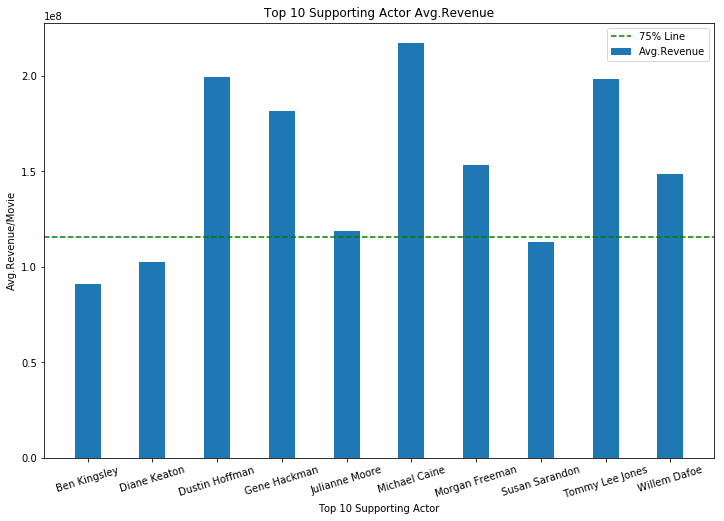

In [58]:
cast_2=actr.loc[actr['Cast_2'].isin(top_ten_c2)]
top_ten_rev=cast_2.groupby('Cast_2')['revenue_adj'].mean().astype(int)
fig, ax = plt.subplots(figsize=(12,8))
index=np.arange(10)
bar_width=0.4
plt.bar(index,top_ten_rev,bar_width,label='Avg.Revenue')
plt.axhline(y=115234121,c='g',linestyle='dashed',label='75% Line')
plt.legend()
plt.title('Top 10 Supporting Actor Avg.Revenue')
plt.xticks(index,list(top_ten_rev.reset_index()['Cast_2']),rotation=17)
plt.xlabel('Top 10 Supporting Actor')
plt.ylabel('Avg.Revenue/Movie')
top_ten_rev


Cast_3
Cameron Diaz         400011361
Donald Sutherland    115315521
Ed Harris            181460593
Harvey Keitel        118571363
John Leguizamo       123989753
Ned Beatty           224902945
Rosario Dawson        57019417
Samuel L. Jackson    215274486
Steve Buscemi        134889784
Susan Sarandon        81935053
Name: revenue_adj, dtype: int64

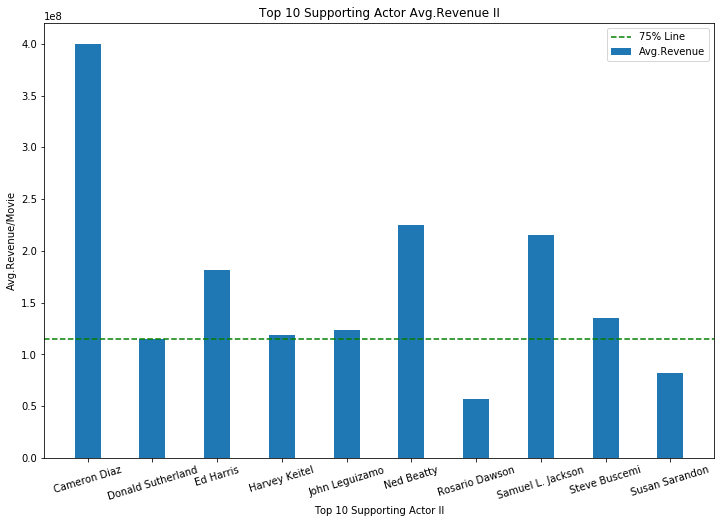

In [55]:
cast_3=actr.loc[actr['Cast_3'].isin(top_ten_c3)]
top_ten_rev=cast_3.groupby('Cast_3')['revenue_adj'].mean().astype(int)
fig, ax = plt.subplots(figsize=(12,8))
index=np.arange(10)
bar_width=0.4
plt.bar(index,top_ten_rev,bar_width,label='Avg.Revenue')
plt.axhline(y=115234121,c='g',linestyle='dashed',label='75% Line')
plt.legend()
plt.title('Top 10 Supporting Actor Avg.Revenue II')
plt.xticks(index,list(top_ten_rev.reset_index()['Cast_3']),rotation=17)
plt.xlabel('Top 10 Supporting Actor II')
plt.ylabel('Avg.Revenue/Movie')
top_ten_rev

>Here's a few comparing the top 10 leading & supporting actor(by number of filmography) average movie revenue vs the top 75% & mean revenue in the whole dataset. <br>
- For leading role, it have a significant influence on the movie revenue,7 of 10 actor is beyond 75% line and Tom Hanks is doubled it in revenue.
- For supporting role it can also play big part drawing traffic, 17 of 20 actor here reached 75% line and Cameron Diaz tripled it in her average movie revenue.

<a id='conclusions'></a>
## Conclusions

- For the 1st question, the most popular genres is changing throughout the year, from this analysis the most popular genres is Advanture from 1960 to 2015. However there's also limitation on this conclusion. We don't have a good popularity adjustment for older movie(like revenue and revenue_adj), this limited the older movie popularity inside the numbers. Still there's large amount of movie from older era in IMDB Top 100, I would also conclude the voting data into this combined with popularity so the result will be more convincible.
- For revenue influece in a movie, both director and actor/actress can have a huge impact, in general an Oscar awarded/well known director and actor/actress have more potential to achieve better performance in revenue, they played a crucial role here. Also there's limitation in this analysis due to large amount of missing revenue/budget data. Over 60% of revenue can only be put up with mean value which doesn't represent true data, so the result we drawed is partialy correct which under the assumption of mean value for the revenue. For a deeper investigate we will need more accurate data sample.
- Budget & Voting can be also a factor impacting revenue too, also this is limited by the data data incompleteness.